In [5]:
# When comparing two data sets using statistical tools, it is not
# sufficient to simply compare their average or median values. This is because
# such results can be skewed by randomness. For example, suppose we are
# calculating the median values of ten seeds. If one algorithm gets "lucky"
# and happens to use more above-average seeds, the estimated median will
# be skewed. Therefore, it is necessary to check the statistical significance of
# results. This is exactly what the indifferent entries are displaying. To determine
# statistical significance, the Kruskal-Wallis and Mann-Whitney U tests with 95% confidence
# intervals can be used.

# The Kruskal-Wallis H-test tests the null hypothesis that the population median of all
# of the groups are equal. It is a non-parametric version of ANOVA.
# The test works on 2 or more independent samples, which may have different sizes.
# Note that rejecting the null hypothesis does not indicate which of the groups differs.
# Post hoc comparisons between groups are required to determine which groups are different.

In [6]:
import numpy as np
from scipy import stats
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
sys.path.append("..")
import rbf_functions

In [7]:
rbfs = [
    rbf_functions.original_rbf,
    rbf_functions.squared_exponential_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

# Kruskal-Wallis HV local reference set

In [13]:
refsets = {}
for entry in rbfs:
    rbf = entry.__name__
    df_hv_data = pd.read_csv(f"refsets/{rbf}_refset.csv")
    refsets[rbf] = df_hv_data
# df_hv = pd.DataFrame.from_dict(hvdata, orient="index")
# hvdata

In [19]:
objectives = refsets['original_rbf'].columns.values.tolist()

In [109]:
import itertools
import collections

combinations = itertools.combinations([rbf.__name__ for rbf in rbfs], 2)

results = pd.DataFrame(index=index, columns=[rbf.__name__ for rbf in rbfs])
for rbf_i, rbf_j in combinations:
    teststatistics = {}
    for obj in objectives:
        data_i_obj = refsets[rbf_i][obj]
        data_j_obj = refsets[rbf_j][obj]
        krusval, pval = stats.kruskal(data_i_obj, data_j_obj)
        results.loc[(rbf_i, obj), (rbf_j)]= pval 

    
results= results.fillna(0)

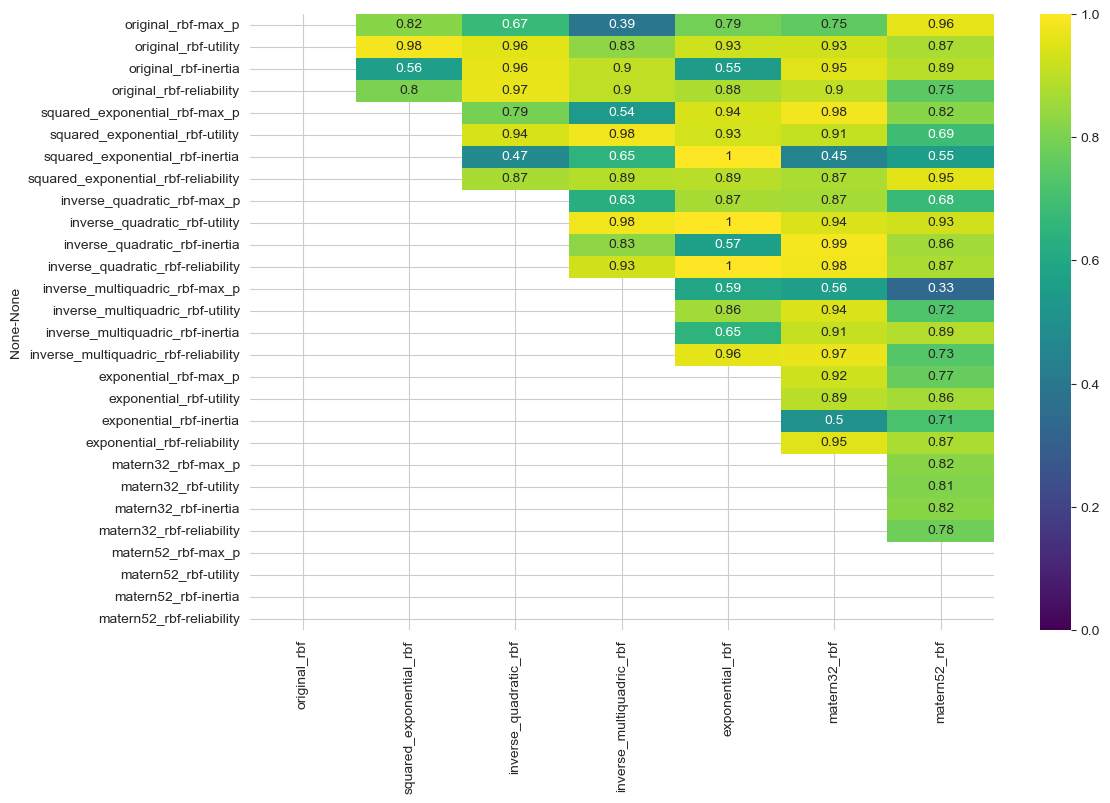

In [113]:
fig, ax = plt.subplots()

sns.heatmap(results, annot=True, cmap='viridis', ax=ax, mask=(results==0), vmin=0)
# ax.set_aspect('equal')

plt.show()